<h1> imports<h1>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

<h2>Setup<h2>

In [3]:
df= con = sqlite3.connect('../nokia.db')
df = pd.read_sql_query('SELECT * FROM Makkah_5g', con)
con.close()

In [10]:
data = df.dropna(subset=['RSRP (d Bm)-Dominant RSRP (d Bm) '])
data = data.fillna(0)

features = [
    'Latitude', 'Longitude', 'Serving Channel Info-DL EARFCN',
    'Serving Cell Info-Serving PCI', 'Serving RS Info-NR Best SS-RSRP',
    'Serving RS Info-NR Best SS-SINR', 'Data Throughput-RLC DL Throughput (kbps)',
    'Serving RS Info-Serving RSRP (d Bm)', 'Serving RS Info-Serving RS CINR (d B)',
    'Serving RS Info-Serving RSRQ (d B)', 'Data Throughput-NR PDCP downlink throughput (Mbps)',
    '5G NR-NR Best SS-RSRP', '5G NR-NR PDCP downlink throughput (Mbps)',
    '5G NR-NR Best SS-SINR'
]

X = data[features]
y = data['RSRP (d Bm)-Dominant RSRP (d Bm) ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

<h3>Predicting RSRP<h3>

<h4>Linear, Lasso, Ridge and elastic regressions<h4>

In [12]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Evaluate Linear Regression model
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_pred)
print(f'Linear Regression RMSE: {linear_rmse}')
print(f'Linear Regression R2: {linear_r2}')

# Define parameter grid for Ridge Regression
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_model = Ridge()
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Get best model
best_ridge_model = ridge_grid_search.best_estimator_
ridge_pred = best_ridge_model.predict(X_test)

# Evaluate Ridge Regression model
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)
print(f'Ridge Regression RMSE: {ridge_rmse}')
print(f'Ridge Regression R2: {ridge_r2}')
print(f'Best Ridge Parameters: {ridge_grid_search.best_params_}')

# Define parameter grid for Lasso Regression
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_model = Lasso()
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Get best model
best_lasso_model = lasso_grid_search.best_estimator_
lasso_pred = best_lasso_model.predict(X_test)

# Evaluate Lasso Regression model
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)
print(f'Lasso Regression RMSE: {lasso_rmse}')
print(f'Lasso Regression R2: {lasso_r2}')
print(f'Best Lasso Parameters: {lasso_grid_search.best_params_}')

Linear Regression RMSE: 3.6618276609338642
Linear Regression R2: 0.8289245190819075
Ridge Regression RMSE: 3.6617444944035067
Ridge Regression R2: 0.8289322898422633
Best Ridge Parameters: {'alpha': 1.0}


/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70742.36607164965, tolerance: 89.5645872735215
  model = cd_fast.enet_coordinate_descent(
/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71932.722077243, tolerance: 89.82858808237235
  model = cd_fast.enet_coordinate_descent(
/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70275.66232656404, tolerance: 89.67660664150102
  model = cd_fast.enet_coordinate_descent(
/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packag

Lasso Regression RMSE: 3.6658779592380815
Lasso Regression R2: 0.8285458612083775
Best Lasso Parameters: {'alpha': 0.01}


/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88184.6711126349, tolerance: 112.40649780837943
  model = cd_fast.enet_coordinate_descent(


<h4>Random Forest<h4>

In [15]:
# Define parameter grid for Random Forest Regression
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Get best model
best_rf_model = rf_grid_search.best_estimator_
rf_pred = best_rf_model.predict(X_test)

# Evaluate Random Forest Regression model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print(f'Random Forest Regression RMSE: {rf_rmse}')
print(f'Random Forest Regression R2: {rf_r2}')
print(f'Best Random Forest Parameters: {rf_grid_search.best_params_}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

In [18]:
# Define parameter grid for Random Forest Regression
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train)
# Get best model
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest Regression model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print(f'Random Forest Regression RMSE: {rf_rmse}')
print(f'Random Forest Regression R2: {rf_r2}')

Random Forest Regression RMSE: 2.945399140686294
Random Forest Regression R2: 0.8893171638081663


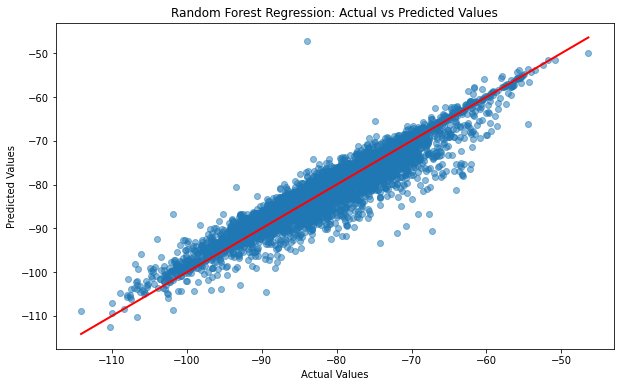

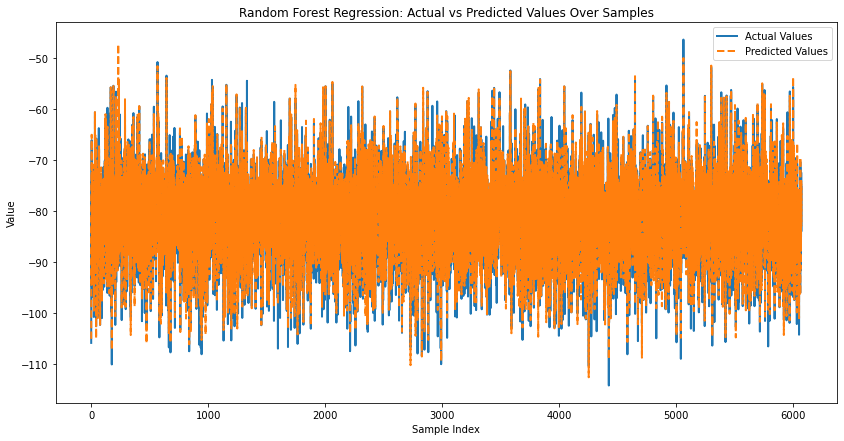

In [19]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted Values')
plt.show()

# Line plot
plt.figure(figsize=(14, 7))
plt.plot(range(len(y_test)), y_test, label='Actual Values', linewidth=2)
plt.plot(range(len(y_test)), rf_pred, label='Predicted Values', linewidth=2, linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Random Forest Regression: Actual vs Predicted Values Over Samples')
plt.legend()
plt.show()


<h4>Nueral Network<h4>

In [14]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for MLP Regressor
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01]
}
mlp_model = MLPRegressor(max_iter=1000, random_state=42)
mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
mlp_grid_search.fit(X_train_scaled, y_train)

# Get best model
best_mlp_model = mlp_grid_search.best_estimator_
mlp_pred = best_mlp_model.predict(X_test_scaled)

# Evaluate MLP Regressor model
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))
mlp_r2 = r2_score(y_test, mlp_pred)
print(f'MLP Regressor RMSE: {mlp_rmse}')
print(f'MLP Regressor R2: {mlp_r2}')
print(f'Best MLP Regressor Parameters: {mlp_grid_search.best_params_}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs

KeyboardInterrupt: 